In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from importlib import reload


In [56]:
with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results/HER2Networks.pkl", 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    print(p)

SSNMTF(G_init=None, adjacencies=None, compute_ktt=False, epsilon=1e-10,
    gamma=0, init='svd', k=14, max_iter=500,
    random_state=<mtrand.RandomState object at 0x128436d38>, rtol=1e-08,
    tol=0.01, verbose=1)


In [54]:
p.G_.shape

(1000, 14)

In [37]:
import nmtf.utils; reload(nmtf.utils)
from nmtf.utils import erdos_renyi
import nmtf.thresholding; reload(nmtf.thresholding)
from nmtf.thresholding import thresholding_generating_graphs

# look at results

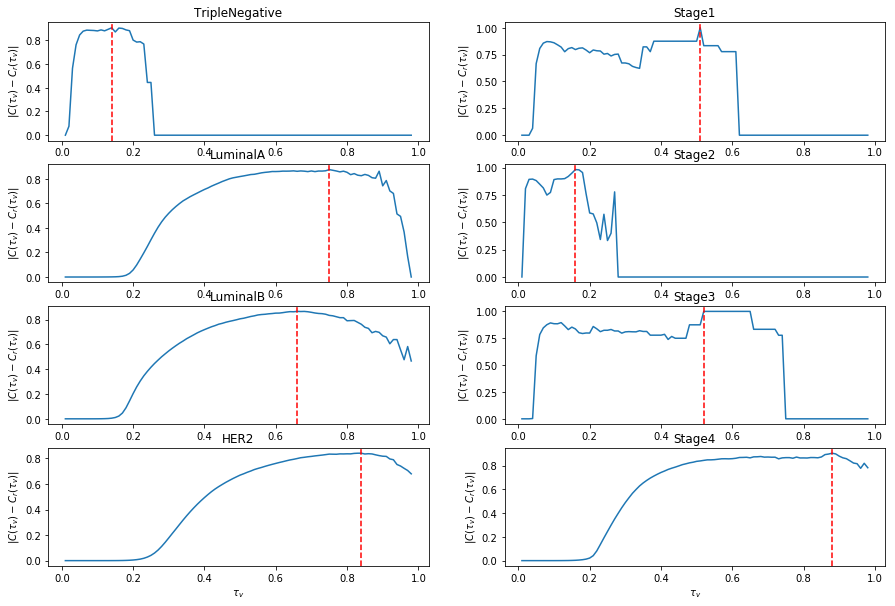

In [89]:
groups = ['TripleNegative', 'LuminalA', 'LuminalB', 'HER2', 'Stage1', 'Stage2', 'Stage3', 'Stage4']
fig, axs = plt.subplots(4,2, figsize=(15,10))
for i,g in enumerate(groups):
    with open("/Users/veronica/Dropbox (DIBRIS)/project_ucl/results_thresholding/"+g+"Networks_thresholding_results.pkl", 'rb') as f:
        u = pkl._Unpickler(f)
        u.encoding = 'latin1'
        t = u.load()
        xs = np.arange(0.01, 0.99, 0.01)
        ys = t[0][np.arange(0, len(t[0]), 10)]
        axs[i%4,i//4].plot(xs, ys)
        axs[i%4,i//4].axvline(xs[np.argmax(ys)], c='r', linestyle='--')
        axs[i%4,i//4].set_xlabel(r'$\tau_v$')
        axs[i%4,i//4].set_ylabel(r' $|C(\tau_v) - C_r(\tau_v)|$ ')
        axs[i%4,i//4].set_title(g)

plt.savefig("/Users/veronica/Dropbox (DIBRIS)/project_UCL/results_thresholding/thres_res.png", dpi=200, 
  transparent=True, bbox_inches='tight')
plt.show()

In [86]:
xs[np.argmax(ys)]

0.14

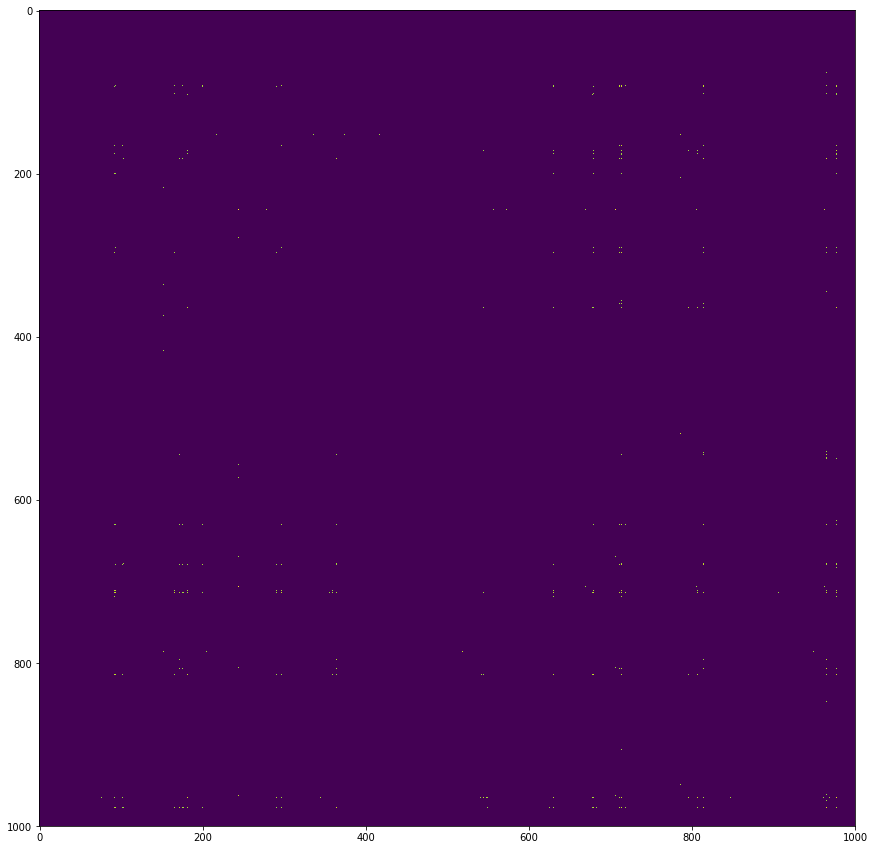

In [60]:
itegrated = p.G_.dot(np.mean(p.S_, axis=0)).dot(p.G_.T)
integrated = integrated - np.min(integrated)
integrated *= 1/np.max(integrated)
integrated[np.where(integrated<0.84)] = 0
plt.figure(figsize=(15,15))
plt.imshow(integrated)
plt.show()

In [61]:
integrated.shape

(1000, 1000)

In [62]:
from nmtf.read import get_adjacency

In [63]:
get_adjacency("/Users/veronica/Dropbox (DIBRIS)/project_ucl/BCStages-SubtypesNetworks/HER2Networks/aracneaHER2.txt")

1000


matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])